In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [38]:
# Try reading the file with a different encoding
df = pd.read_csv('C:/Users/admin/Desktop/Data Analysis Projects/Indian General elections 2024 data analysis/Indian General Elections 2024.csv', 
                 encoding='latin1')

In [9]:
df.head()

,State/UT,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,1,BISHNU PADA RAY,Bharatiya Janata Party,KULDEEP RAI SHARMA,Indian National Congress,24396,Result Declared
1,Andhra Pradesh,Amalapuram (SC),7,G M HARISH (BALAYOGI),Telugu Desam,RAPAKA VARAPRASADA RAO,Yuvajana Sramika Rythu Congress Party,342196,Result Declared
2,Andhra Pradesh,Anakapalle,5,C.M.RAMESH,Bharatiya Janata Party,BUDI MUTYALA NAIDU,Yuvajana Sramika Rythu Congress Party,296530,Result Declared
3,Andhra Pradesh,Ananthapur,19,AMBICA G LAKSHMINARAYANA VALMIKI,Telugu Desam,MALAGUNDLA SANKAR NARAYANA,Yuvajana Sramika Rythu Congress Party,188555,Result Declared
4,Andhra Pradesh,Araku (ST),1,GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,KOTHAPALLI GEETHA,Bharatiya Janata Party,50580,Result Declared


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State/UT            543 non-null    object
 1   Constituency        543 non-null    object
 2   Const. No.          543 non-null    int64 
 3   Leading Candidate   543 non-null    object
 4   Leading Party       543 non-null    object
 5   Trailing Candidate  542 non-null    object
 6   Trailing Party      542 non-null    object
 7   Margin              543 non-null    object
 8   Status              543 non-null    object
dtypes: int64(1), object(8)
memory usage: 38.3+ KB


# Handling Duplicate Values

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
538    False
539    False
540    False
541    False
542    False
Length: 543, dtype: bool

# Summary statistics for numerical columns

In [14]:
df.describe()

,Const. No.
count,543.000000
mean,18.178637
std,16.427840
min,1.000000
25%,6.000000
50%,14.000000
75%,25.000000
max,80.000000


# Convert Margin to numeric if it represents numerical data

In [16]:
# Convert Margin to numeric if it represents numerical data
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

# Handling Missing values

In [17]:
df.isna().sum()

State/UT              0
Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                1
Status                0
dtype: int64

In [18]:
# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for object columns
print(df.describe(include='object'))

# Value counts for categorical columns
print(df['Leading Party'].value_counts())
print(df['Trailing Party'].value_counts())
print(df['Status'].value_counts())

       Const. No.        Margin
count  543.000000  5.420000e+02
mean    18.178637  1.623495e+05
std     16.427840  1.472633e+05
min      1.000000  4.800000e+01
25%      6.000000  5.895675e+04
50%     14.000000  1.222660e+05
75%     25.000000  2.229720e+05
max     80.000000  1.175092e+06
             State/UT Constituency Leading Candidate           Leading Party  \
count             543          543               543                     543   
unique             36          541               542                      42   
top     Uttar Pradesh  Maharajganj      RAHUL GANDHI  Bharatiya Janata Party   
freq               80            2                 2                     240   

        Trailing Candidate            Trailing Party           Status  
count                  542                       542              543  
unique                 542                        42                3  
top     KULDEEP RAI SHARMA  Indian National Congress  Result Declared  
freq                   

# Distribution of margins

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


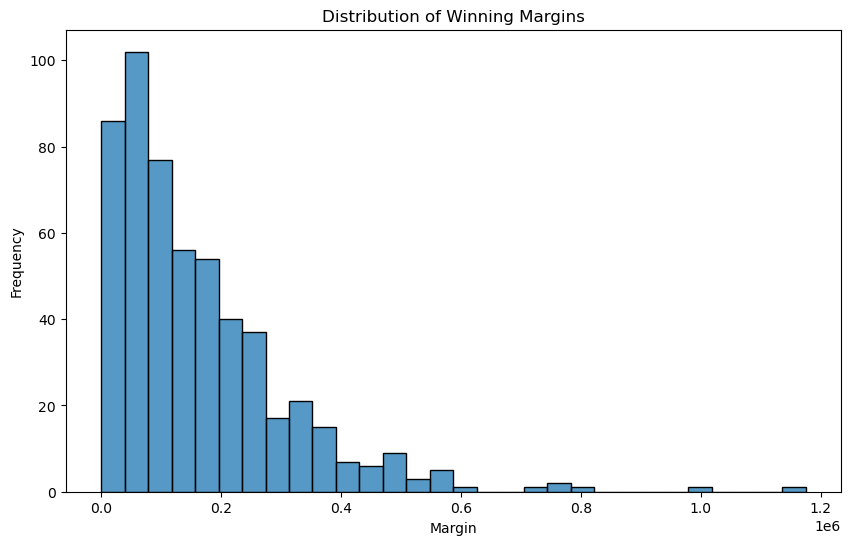

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=30)
plt.title('Distribution of Winning Margins')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

# Leading party count

C:\Users\admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


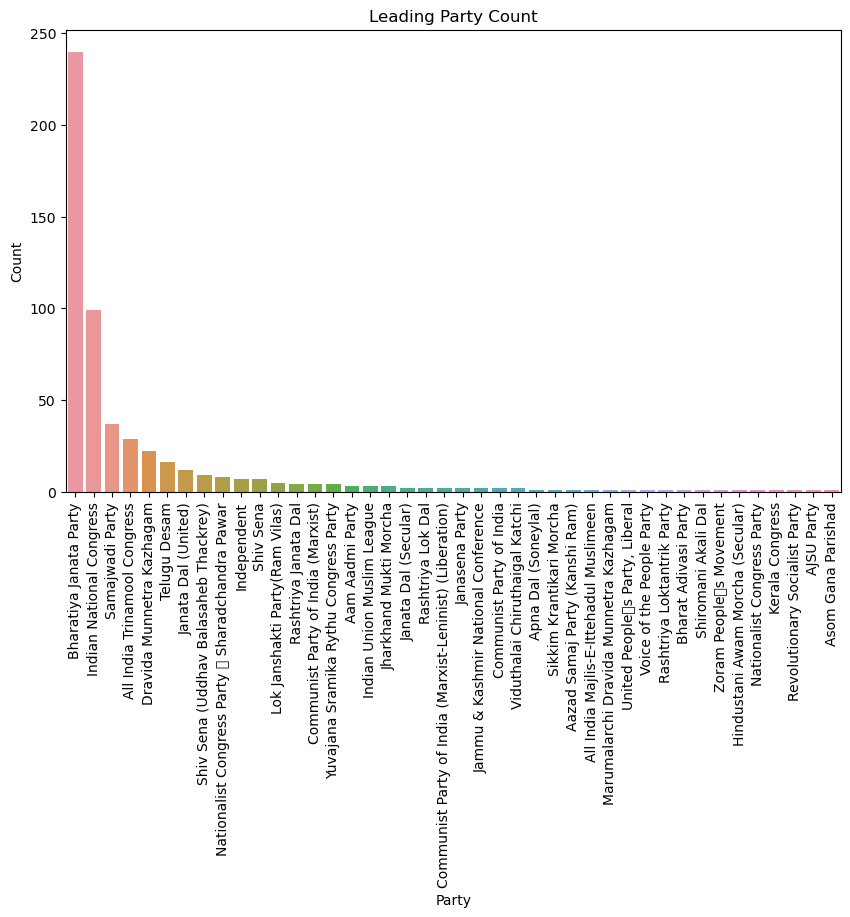

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Leading Party', order=df['Leading Party'].value_counts().index)
plt.title('Leading Party Count')
plt.xlabel('Party')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Generate a heatmap

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.draw()
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
C:\Users\admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


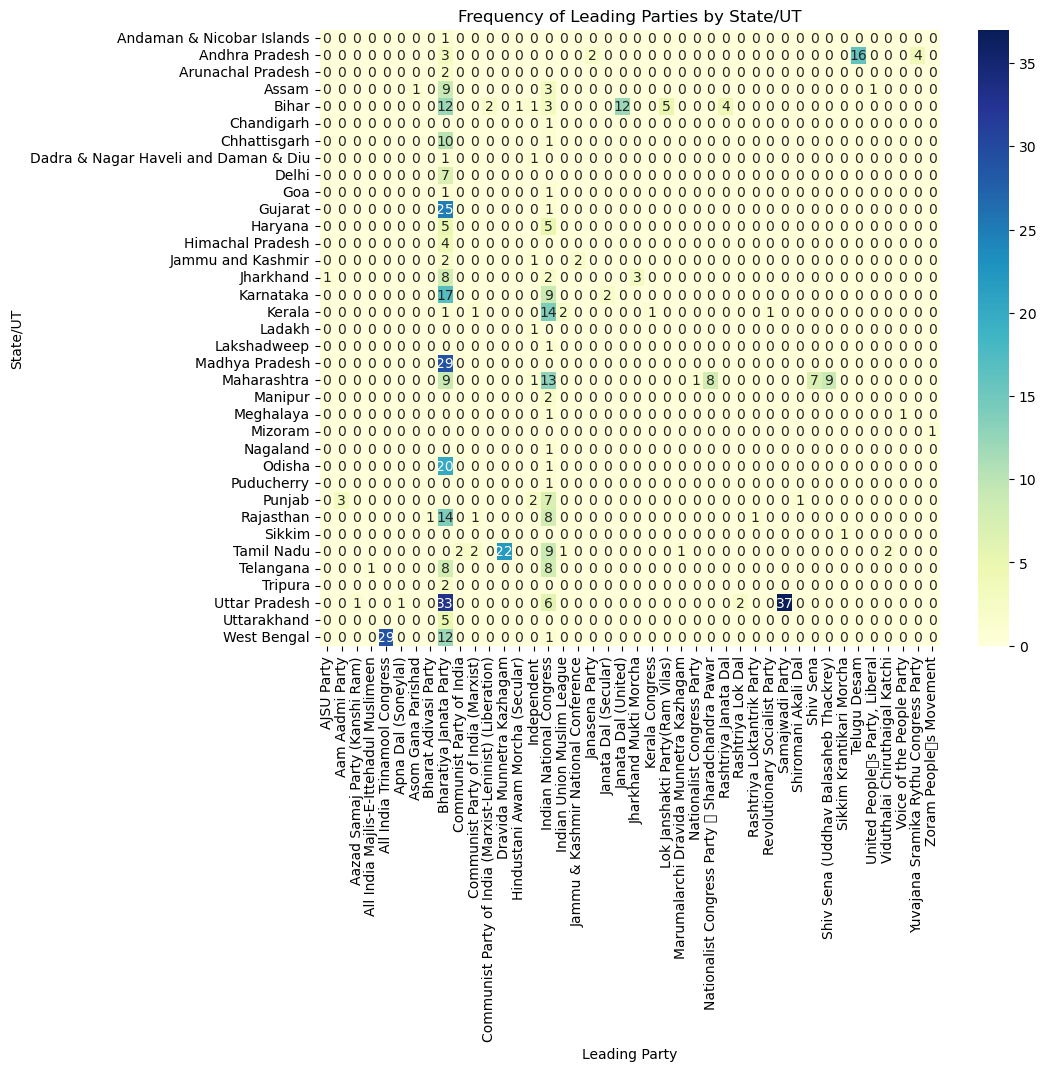

In [39]:
pivot_table = df.pivot_table(index='State/UT', columns='Leading Party', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Frequency of Leading Parties by State/UT')
plt.xlabel('Leading Party')
plt.ylabel('State/UT')
plt.xticks(rotation=90)
plt.show()

# Plotting the seat distribution

C:\Users\admin\AppData\Local\Temp\ipykernel_2148\50935313.py:9: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_2148\50935313.py:9: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()


<Figure size 1400x1000 with 0 Axes>

C:\Users\admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


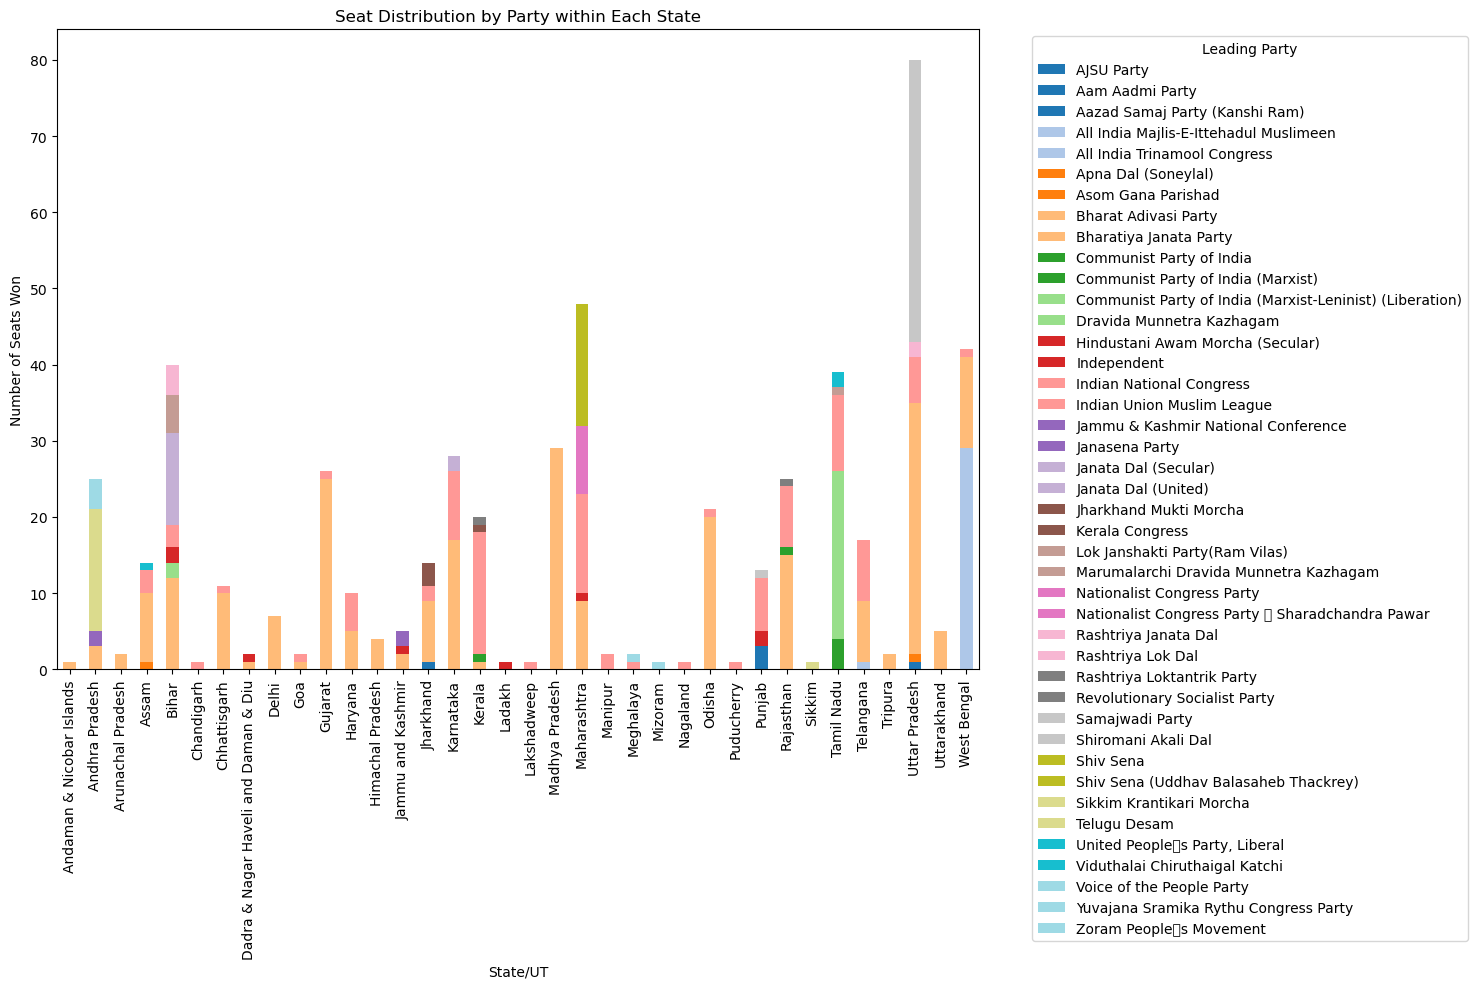

In [24]:
plt.figure(figsize=(14, 10))
pivot_table.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 10))
plt.title('Seat Distribution by Party within Each State')
plt.xlabel('State/UT')
plt.ylabel('Number of Seats Won')
plt.xticks(rotation=90)
plt.legend(title='Leading Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()